# <center>**Analysis of the famous 'Storks' Data**
    
#### <center>by Kweku E. Acquaye.</center>

**Table of Contents**

1. Section 1: Introduction
  * Section 1.1: Outline
  * Section 1.2: Loading the Data
2. Section 2: Data Preparation
  * Section 2.1: Exploration Data Analysis (EDA)
  * Section 2.2: Normalising Data
3. Section 3: Variability of Human Birth Numbers 
  * Section 3.1: Model 1 - Variation of Human Birth Numbers with Number of Stork Pairs
  * Section 3.2: Model 2 - Variation of Human Birth Numbers with Human Population Size
  * Discussion
  * Section 3.3: Using Bootstrap Technique to Estimate Distribution of Difference in r2 Parameter for the Two Models
  * Discussion
4. Section 4: Comparing Performance of Two Regression Models in Predicting Stork Pair Numbers
  * Section 4.1: Model 1 - Predictor is Land Area
  * Section 4.2: Model 2 - Predictors are (i) Population Density and (ii) Area of Suitable Land
  * Discussion
  * Section 4.3: Using Bootstrap Technique to Estimate Difference in Root Mean Squared Error (RMSE) between Predicted and Actual Values for the Two Models
  * Discussion
5. Section 5: Discussion and Conclusions 

## **Section 1: Introduction**
This report uses modern data science methods to analyse and build correlation and regression models that look at the effect of predictor variables on a target variable. It constitutes Coursework 2 in fulfilment of the requirements of Statistics for Data Science and AI module.

**Declaration:** Some of the code used in this report has been adapted and customized from www.docs.python.org/, www.matplotlib.org/stable/, www.pandas.pydata.org/docs, www.stackoverflow.com/questions/, www.geeksforgeeks.org/, www.kite.com/python/answers/, www.codegrepper.com/, www.machinelearningmind.com/, and Statistics for Data Science and AI Lab, Lecture, and Tutorial Notes.

### **Section 1.1: Outline**
The aim of this analysis is to compare two regression models with a view to explaining the variability of the number of births in 17 countries, which in a paper by Robert Matthews$^1$, had been linked to the number of stork pairs in the country to illustrate misunderstanding of regression correlation coefficients and p-values.

### **Section 1.2: Loading the Data**<br>
The stork data used in this analysis was supplied by Chris Harbard$^2$ of
the Royal Society for the Protection of Birds (RSPB) to the author of the paper "Storks Deliver Babies (p = 0.008)”$^1$, with demographic data taken by the paper author from Britannica Yearbook for 1990. The dataset comprises the following variables:<br>

| Variable      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|Country   | 17 European countries with available stork data.                  | Originally String, converted to category on loading  |
|Area           | Surface area in square kilometeres                             | continuous (integer) | 
|Storks   | Number of stork pairs            | continuous (integer) |
|Humans | Human population in millions | continuous (float) |
|Birth rate       | Human birth rate in thousands per year                           | continuous (integer) | 
|SuitableAreaPercent       | The percentage of land area suitable for storks             | continuous (float) |




In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import pandas.util.testing as tm
import warnings
warnings.filterwarnings('ignore')
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

print("Libraries imported.")

Libraries imported.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  # This is added back by InteractiveShellApp.init_path()


The creation of the following dictionary enables conversion of the 'Country' column, which would be loaded as a pandas Series, from string to category data type for better data handling in analysis:

In [ ]:
# Creating country dictionary
cntry = pd.CategoricalDtype(categories=['Albania','Austria','Belgium','Bulgaria', 'Denmark', 'France', 'Germany', 'Greece', 'Holland', 
                                          'Hungary', 'Italy', 'Poland', 'Portugal', 'Romania', 'Spain', 'Switzerland', 'Turkey'], ordered=False)
types_dict = {'Country':cntry}
print("Dictionary created.")

Dictionary created.


In [ ]:
# Loading original data
original_df = pd.read_csv('storks.csv', dtype = types_dict, error_bad_lines=False)
print("Original data loaded.")

Original data loaded.


To preserve integrity of original data file from accidental alteration, analysis would be carried out on a copy.

In [ ]:
# Creating copy to preserve original data file
safe_df1 = original_df.copy()
print("Copied version created as follows:")
safe_df1

Copied version created as follows:


,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


### **Section 2: Data Preparation**<br>
The following steps prepare the data for analysis:<br>
<br>
**Section 2.1: Exploratory Data Analysis (EDA)**

In [ ]:
# Data types and null cells
safe_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country              17 non-null     category
 1   Area                 17 non-null     int64   
 2   Storks               17 non-null     int64   
 3   Humans               17 non-null     float64 
 4   BirthRate            17 non-null     int64   
 5   SuitableAreaPercent  17 non-null     float64 
dtypes: category(1), float64(2), int64(3)
memory usage: 1.6 KB


There is no missing data or 'NaN' (i.e. 'not a number') cells in the dataset.

In [ ]:
# Summary statistics of df
safe_df1.describe()

,Area,Storks,Humans,BirthRate,SuitableAreaPercent
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,219674.705882,5059.352941,25.558824,370.705882,59.995882
std,219561.276416,8833.113607,23.528707,410.046303,10.954876
min,28750.000000,1.000000,3.200000,59.000000,38.340000
25%,43100.000000,100.000000,9.000000,106.000000,55.680000
50%,111000.000000,1500.000000,11.000000,124.000000,59.810000
75%,312680.000000,5000.000000,39.000000,551.000000,65.930000
max,779450.000000,30000.000000,78.000000,1576.000000,81.460000


**Section 2.2: Normalising Data**

From the summary statistics output above, and also from the dataset table, it is observed that given only 17 samples with the country of Turkey presenting large values such that it is likely to disproportionately distort accurate calculation of test statistics and parameters, careful consideration was given to normalising / scaling the data. However, the nature of the answers sought in this analysis means it might be prudent not to normalise (please see Section 5: Conclusions).

### **Section 3: Variability of Human Birth Numbers**<br>
This section aims to compare two regression models with a view to explaining the variability in the number of human births in different countries by means of the coefficient of determination r2.<br>
<br>
**Section 3.1: Model 1 - Variation of Human Birth Numbers with Number of Stork Pairs**<br>
In this subsection the number of human births is correlated with number of stork pairs per country.

In [ ]:
# Setting up for regression
X = safe_df1[["Storks"]]
y = safe_df1[["BirthRate"]]
print("Regression axes assigned.")

Regression axes assigned.


In [ ]:
# Regressing y onto X
reg = LinearRegression()
reg.fit(X, y)
print("Regression line fitted.")

Regression line fitted.


In [ ]:
# Setting up prediction of set results
y_pred = reg.predict(X)
print("Results prediction set up.")

Results prediction set up.


Text(0, 0.5, 'Human Birth Rate x1000 per year')

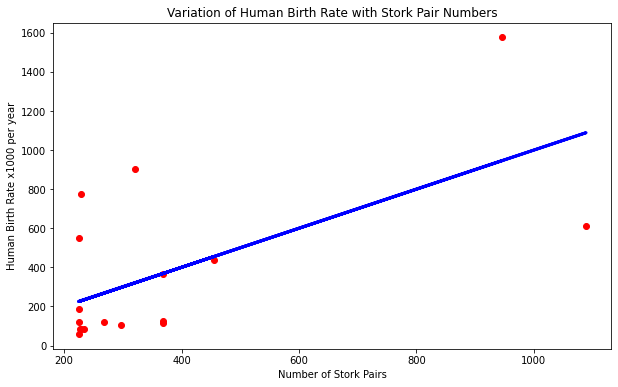

In [ ]:
# Visualising regression
fig, a1 = plt.subplots(1,1,figsize=(10, 6))
a1.scatter(y_pred, y,  color='red')
a1.plot(y_pred, y_pred, color='blue', linewidth=3)

a1.set_title('Variation of Human Birth Rate with Stork Pair Numbers')
a1.set_xlabel('Number of Stork Pairs')
a1.set_ylabel('Human Birth Rate x1000 per year')

In [ ]:
# Outputting coeff of determn, intercept and beta
beta_Stork_Numbers = reg.coef_
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))
print('The intercept is %4.1f' % reg.intercept_)
print('Estimated regression coefficient for Stork Numbers is %4.2f' % beta_Stork_Numbers)

The R2 coefficient of determination is 0.385
The intercept is 225.0
Estimated regression coefficient for Stork Numbers is 0.03


**Section 3.2: Model 2 - Variation of Human Birth Numbers with Human Population Size**<br>
In this subsection the number of human births is correlated with human population per country.

In [ ]:
# Setting up for regression
X2 = safe_df1[["Humans"]]
y2 = safe_df1[["BirthRate"]]
print("Regression axes assigned.")

Regression axes assigned.


In [ ]:
# Regressing y onto X
reg2 = LinearRegression()
reg2.fit(X2, y2)
print("Regression line fitted.")

Regression line fitted.


In [ ]:
# Setting up prediction of set results
y_pred2 = reg2.predict(X2)
print("Results prediction set up.")

Results prediction set up.


Text(0, 0.5, 'Human Birth Rate x1000 per year')

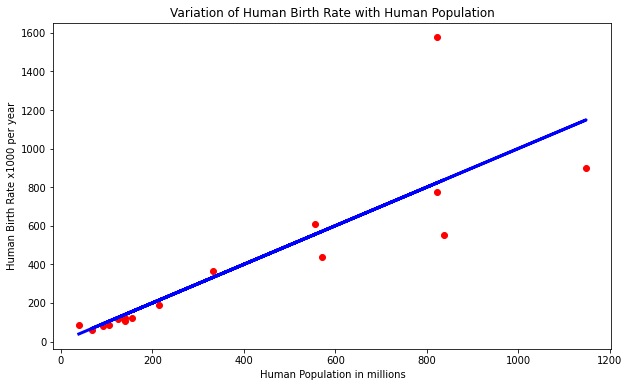

In [ ]:
# Visualising regression
fig, a2 = plt.subplots(1,1,figsize=(10, 6))
a2.scatter(y_pred2, y2,  color='red')
a2.plot(y_pred2, y_pred2, color='blue', linewidth=3)

a2.set_title('Variation of Human Birth Rate with Human Population')
a2.set_xlabel('Human Population in millions')
a2.set_ylabel('Human Birth Rate x1000 per year')

In [ ]:
# Outputting coeff of determn, intercept and beta
beta_Human_Population = reg2.coef_
print('The R2 coefficient of determination is %4.3f' % reg2.score(X, y))
print('The intercept is %4.1f' % reg2.intercept_)
print('Estimated regression coefficient for Stork Numbers is %4.2f' % beta_Human_Population)

The R2 coefficient of determination is -136958.886
The intercept is -8.4
Estimated regression coefficient for Stork Numbers is 14.83


**Discussion**<br>
When human birth rate is correlated with stork pair numbers, the coefficient of determination r2 is obtained to be 0.385, whereas when correlated with human population it is obtained to be -136,959. In this ordinary least squares regression analysis the r2 statistic is the proportion of total variation of outcomes explained by the independent variable(s)$^3$ - and therefore a measure of how good a model prediction is in relation to actual data points. Valid values range from 0 - 1 (zero to one) with increasing level of fit in increasing order from 0 - 1. Values outside the limits of 0 - 1 indicate cases where the constructed model does not explain variation in observed outcome.<br>
<br>
Thus, although the observed r2 values at first glance may suggest that stork pair numbers provide a better variable by which to estimate human birth rates while human population numbers cannot explain variation in human births, the shear absurdity of such conclusions puts the whole method of analysis into question. This is further discussed in Section 5: Conclusions below.<br>
<br>
The same analysis carried out on this data but with scaled (i.e. min-max) and then with standardised (i.e. in terms of / divided by standard deviations) yielded what, at first sight, seemed to be more interpretable values. However such normalised values, in the context of this task, probably defeats the purpose of the analysis - i.e. whether this data is viable or amenable to ordinary least squares regression modelling.

**Section 3.3: Using Bootstrap Technique to Estimate Distribution of Difference in r2 Parameter for the Two Models**

In [ ]:
# Importing libraries
import scipy.stats as stats
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
import math
print("Libraries imported")

Libraries imported


In [ ]:
# Creating regression function for storks
def doRegression_storks(safe_df1):
    y = safe_df1[["BirthRate"]]
    X = safe_df1[["Storks"]]
    reg = LinearRegression().fit(X, y)
    y_hat = reg.predict(X)
    r2_Stork_Numbers = reg.score(X, y)
    return [r2_Stork_Numbers]

print("Regression function for Stork Numbers created.")

Regression function for Stork Numbers created.


In [ ]:
# Creating regression function for humans
def doRegression_humans(safe_df1):
    y2 = safe_df1[["BirthRate"]]
    X2 = safe_df1[["Humans"]]
    reg2 = LinearRegression().fit(X2, y2)
    y_hat2 = reg2.predict(X2)
    r2_Human_Popln = reg2.score(X2, y2)
    return [r2_Human_Popln]

print("Regression function for Human Population created.")

Regression function for Human Population created.


In [ ]:
# Creating bootstrap function
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data))
    return result

print("Bootstrap function created.")

Bootstrap function created.


In [ ]:
# Using bootstrap function to obtain storks r2 distribution
stk_bstrap = bootstrapC(safe_df1, ['R2_Diff'], 500, doRegression_storks)
print("Stork pairs resampled by bootstrap technique.")

Stork pairs resampled by bootstrap technique.


In [ ]:
# Using bootstrap function to obtain humans r2 distribution
hmn_bstrap = bootstrapC(safe_df1, ['R2_Diff'], 500, doRegression_humans)
print("Human population resampled by bootstrap technique.")

Human population resampled by bootstrap technique.


In [ ]:
# Calculating r2 difference
r2_diff = hmn_bstrap - stk_bstrap
r2_diff

,R2_Diff
0,0.626373
1,-0.009931
2,0.580126
3,0.247085
4,0.566991
...,...
495,0.906381
496,0.731801
497,0.387197
498,0.253403


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bfa8587d0>]],
      dtype=object)

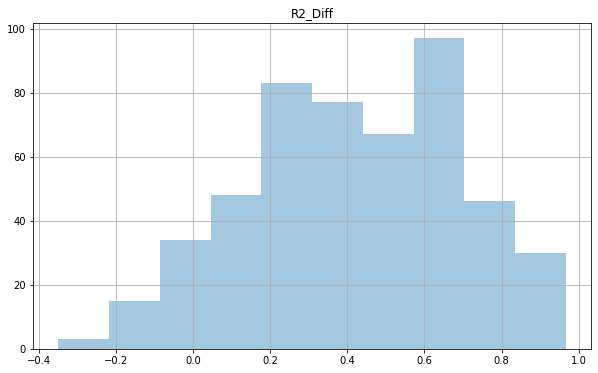

In [ ]:
# Visualising distribution
r2_diff.hist(alpha=0.4, figsize=(10, 6))

In [ ]:
# Outputting CIs
print('The 90%% confidence interval for the difference in the r2 values is %4.3f to %4.3f' % 
      (r2_diff.quantile(0.10), r2_diff.quantile(0.90)))
print('The 95%% confidence interval for the difference in the r2 values is %4.3f to %4.3f' % 
      (r2_diff.quantile(0.05), r2_diff.quantile(0.95)))
print('The 99%% confidence interval for the difference in the r2 values is %4.3f to %4.3f' % 
      (r2_diff.quantile(0.01), r2_diff.quantile(0.99)))

The 90% confidence interval for the difference in the r2 values is 0.026 to 0.746
The 95% confidence interval for the difference in the r2 values is -0.034 to 0.869
The 99% confidence interval for the difference in the r2 values is -0.187 to 0.947


**Discussion**<br>
Considering that the Bootstrapping technique enables resampling from a sample instead of the population, it may be considered ideal for this small sample size. At the same time and contrary to this, the very property of smallness of this dataset means resampling it at length would hardly yield much variation.<br> 

The confidence interval (CI), being the range of sample statistic distribution within which we can be confident of finding the population mean with a stated percentage, were obtained to be as output above. True sampling distribution however depends on the population parameters$^4$. Taking the Storks dataset as a true sampling from the population of European countries, their birth rates and stork numbers, the 90%, 95% and 99% values obtained above are the certainties of the estimated difference in r2 values by the two different models. Unlike the 90% CI, the 95% and 99% CI do contain or pass through zero. This means that the latter two CIs'
p-values (associated with a null hypothesis that there is no statistically significant difference between the two models' estimates of r2) will be greater than 0.05 and 0.01 respectively at relevant degrees of freedom. Hence there would be no evidence to reject the null hypothesis in those two cited CIs.<br> 

Conversely, since the 90% CI does not contain the value zero, then the p-value associated with the null hypothesis (above) would be less than 0.10, meaning there is evidence to reject the null hypothesis.<br> 

This presents a conundrum - in a normal analysis we would expect things, if in any doubt, to be the other way round. Instead we have a situation where at 90% CI there is evidence to reject the null hypothesis, but at 95% and 99% CI there is no evidence to reject the null hypothesis. An attempt is made at explaining this anomaly in Section 5: Conclusions below.

### **Section 4: Comparing Performance of Two Regression Models in Predicting Stork Pair Numbers**<br> 
This section aims to compare two regression models with a view to explaining the variability in the number of stork pairs in different countries by using the root mean squared error (RMSE).<br> 

**Section 4.1: Model 1 - Predictor is Land Area**

In [ ]:
# Setting up for number of storks and land area regression
X3 = safe_df1[["Area"]]
y3 = safe_df1[["Storks"]]
print("Regression axes assigned.")

Regression axes assigned.


In [ ]:
# Regressing y onto X
reg3 = LinearRegression()
reg3.fit(X3, y3)
print("Regression line fitted.")

Regression line fitted.


In [ ]:
# Setting up prediction of set results
y_pred3 = reg3.predict(X3)
print("Results prediction set up.")

Results prediction set up.


Text(0, 0.5, 'Number of Stork Pairs')

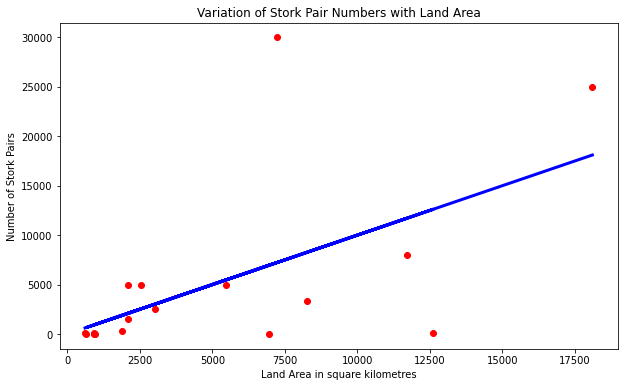

In [ ]:
# Visualising regression
fig, a3 = plt.subplots(1,1,figsize=(10, 6))
a3.scatter(y_pred3, y3,  color='red')
a3.plot(y_pred3, y_pred3, color='blue', linewidth=3)

a3.set_title('Variation of Stork Pair Numbers with Land Area')
a3.set_xlabel('Land Area in square kilometres')
a3.set_ylabel('Number of Stork Pairs')

In [ ]:
# Outputting coeff of determn, intercept and beta
beta_Land_Area = reg3.coef_
print('The R2 coefficient of determination is %4.3f' % reg3.score(X3, y3))
print('The intercept is %4.1f' % reg3.intercept_)
print('Estimated regression coefficient for Land Area is %4.2f' % beta_Land_Area)

# Outputting RMSE
MSE_3 = mean_squared_error(y3, y_pred3)
RMSE_3 = math.sqrt(MSE_3)
print("The RMSE for the model of Land Area as a predictor of Stork Pair Numbers is " + str(round(RMSE_3, 2)))

The R2 coefficient of determination is 0.336
The intercept is -60.7
Estimated regression coefficient for Land Area is 0.02
The RMSE for the model of Land Area as a predictor of Stork Pair Numbers is 6984.77


Text(0, 0.5, 'Actual Stork Pair Numbers')

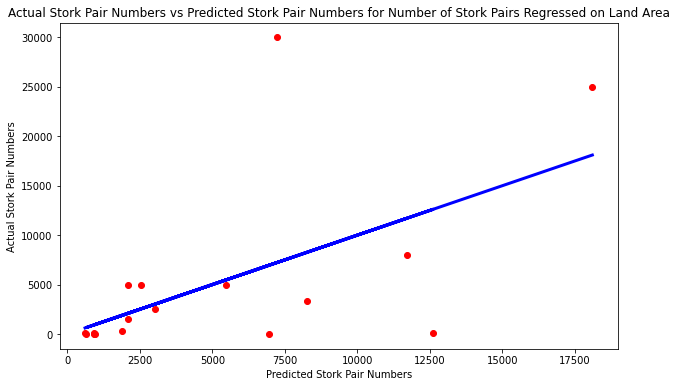

In [ ]:
# Visualising actual vs predicted values 
fig, a4 = plt.subplots(1,1,figsize=(10,6))
a4.scatter(y_pred3, y3,  color='red')
a4.plot(y_pred3, y_pred3, color='blue', linewidth=3)

a4.set_title('Actual Stork Pair Numbers vs Predicted Stork Pair Numbers for Number of Stork Pairs Regressed on Land Area')
a4.set_xlabel('Predicted Stork Pair Numbers')
a4.set_ylabel('Actual Stork Pair Numbers')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bfa751590>]],
      dtype=object)

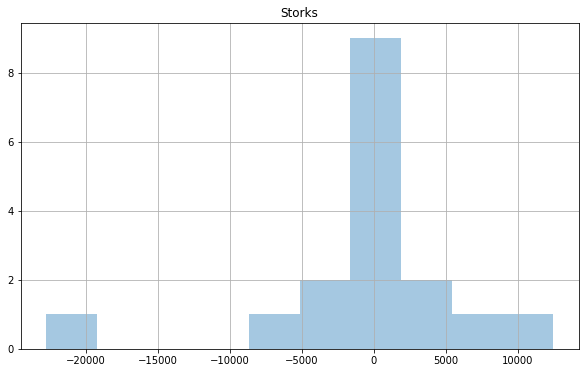

In [ ]:
# Visualising residuals distribution
residuals3 = y_pred3 - y3
residuals3.hist(alpha=0.4, figsize=(10, 6))

In [ ]:
# Calculating root mean squared error
print('Root of the mean squared error (RMSE) is %.2f'% mean_squared_error(y, y_pred3, squared=False))

Root of the mean squared error (RMSE) is 6568.49


**Section 4.2: Model 2 - Predictors are (i) Population Density and (ii) Area of Suitable Land**<br>

To use population density and suitable land area as variables require calculation of these for each country and putting these in new columns:

In [ ]:
# Calculating and appending population density and suitable area
safe_df1['Popln_Density'] = safe_df1['Humans'] * 1000000 / safe_df1['Area']
safe_df1['SuitableArea'] = safe_df1['SuitableAreaPercent'] * safe_df1['Area']
print("New variables calculated and added to dataframe as follows: \n")
safe_df1

New variables calculated and added to dataframe as follows: 



,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent,Popln_Density,SuitableArea
0,Albania,28750,100,3.2,83,55.68,111.304348,1600800.0
1,Austria,83860,300,7.6,87,38.34,90.627236,3215192.4
2,Belgium,30520,1,9.9,118,65.93,324.377457,2012183.6
3,Bulgaria,111000,5000,9.0,117,57.99,81.081081,6436890.0
4,Denmark,43100,9,5.1,59,81.46,118.329466,3510926.0
5,France,544000,140,56.0,774,58.47,102.941176,31807680.0
6,Germany,357000,3300,78.0,901,59.81,218.487395,21352170.0
7,Greece,132000,2500,10.0,106,47.31,75.757576,6244920.0
8,Holland,41900,4,15.0,188,70.96,357.995227,2973224.0
9,Hungary,93000,5000,11.0,124,75.86,118.279570,7054980.0


In [ ]:
# Setting up for number of storks vs population density and area of suitable land
y4 = safe_df1.Storks
X4 = np.column_stack((safe_df1.Popln_Density, safe_df1.SuitableArea))
print("Regression axes assigned.")

Regression axes assigned.


In [ ]:
# Regressing y onto X
reg4 = LinearRegression()
reg4.fit(X4, y4)
print("Regression line fitted.")

Regression line fitted.


In [ ]:
# Setting up prediction of set results
y_pred4 = reg4.predict(X4)
print("Results prediction set up.")

Results prediction set up.


In [ ]:
# Outputting coeff of determn, intercept and beta
print('The R2 coefficient of determination is %4.3f' % reg4.score(X4, y4))
print('The intercept is %4.1f' % reg4.intercept_)
beta_Popln_Density, beta_Suitable_Area = reg4.coef_
print('Estimated regression coefficient for Human Population Density is %4.2f' % beta_Popln_Density)
print('Estimated regression coefficient for Suitable Area is %4.2f' % beta_Suitable_Area)

# Outputting RMSE
MSE_4 = mean_squared_error(y4, y_pred4)
RMSE_4 = math.sqrt(MSE_4)
print("The RMSE for the model of Human Population Density and Suitable Land Area for storks as predictors of Stork Pair Numbers is " 
      + str(round(RMSE_4, 2)))

The R2 coefficient of determination is 0.393
The intercept is 1881.4
Estimated regression coefficient for Human Population Density is -12.13
Estimated regression coefficient for Suitable Area is 0.00
The RMSE for the model of Human Population Density and Suitable Land Area for storks as predictors of Stork Pair Numbers is 6677.03


Text(0, 0.5, 'Actual Stork Pair Numbers')

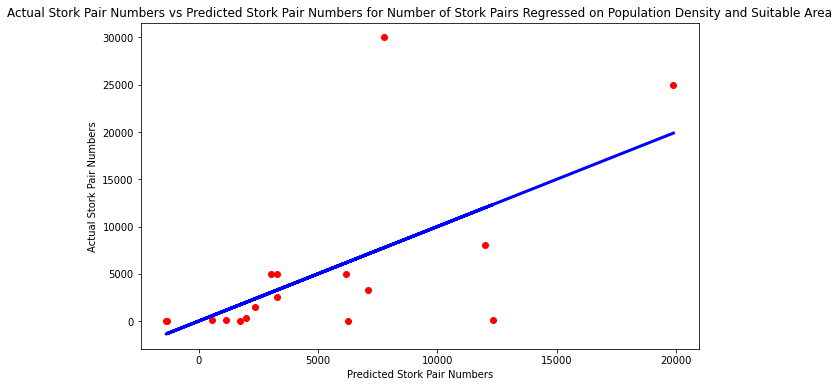

In [ ]:
# Visualising actual vs predicted values
fig, a5 = plt.subplots(1,1,figsize=(10, 6))
a5.scatter(y_pred4, y4,  color='red')
a5.plot(y_pred4, y_pred4, color='blue', linewidth=3)

a5.set_title('Actual Stork Pair Numbers vs Predicted Stork Pair Numbers for Number of Stork Pairs Regressed on Population Density and Suitable Area')
a5.set_xlabel('Predicted Stork Pair Numbers')
a5.set_ylabel('Actual Stork Pair Numbers')

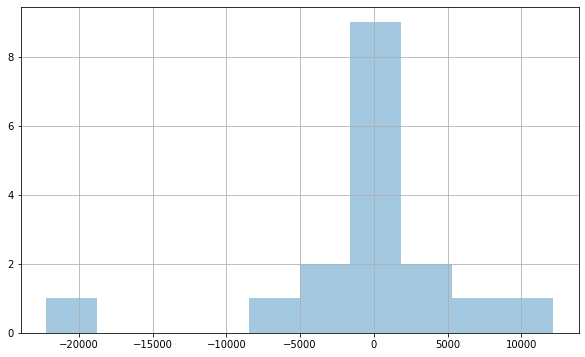

In [ ]:
# Visualising residuals distribution
residuals4 = y_pred4 - y4
residuals4.hist(alpha=0.4, figsize=(10, 6))

**Discussion**<br>
The RMSE, being the standard deviation of the prediction errors (residuals), has its significance in being a measure of how far actual data points are from the models prediction line. From the above outputs it is observed that at small values of stork pairs the predicted values are fairly close the the actual values, but at lager values the data points are further away from the model prediction line, indicating greater departure fron actaul values at higher values. In the second instance of multiple linear regression, the two predictor varaiables of human population density and suitable area for storks can only be said to independently influence the model's predicted values if there is no colinearity between them, i.e. if these two variables do not vary together.<br>

The large values obtained for the RMSEs of the two models above show that the model prediction does not fit the data very well. Smaller RMSEs are more desirable and mean closer fit of predicted values with actual values, with RMSE of zero indicating perfect fit. Because RMSE statistic is sensitive to outliers, it can be speculated that Turkey, and probably Poland too, are effectively acting as outliers in the two models above. 

**Section 4.3: Using Bootstrap Technique to Estimate Difference in Root Mean Squared Error (RMSE) between Predicted and Actual Values for the Two Models**

In [ ]:
# Creating regression function for land area
def doRegression_LA(safe_df1):
    y5 = safe_df1[["Storks"]]
    X5 = safe_df1[["Area"]]
    reg5 = LinearRegression().fit(X5, y5) 
    y_pred5 = reg5.predict(X5)
    MSE = mean_squared_error(y5, y_pred5)
    RMSE_LA = math.sqrt(MSE)
    return [RMSE_LA]

print("Regression function for Stork Numbers created.")

Regression function for Stork Numbers created.


In [ ]:
# Creating regression function for population density and suitable land
def doRegression_PD_SA(safe_df1):
    y6 = safe_df1.Storks
    X6 = np.column_stack((safe_df1.Popln_Density, safe_df1.SuitableArea))
    reg6 = LinearRegression().fit(X6, y6) 
    y_pred6 = reg6.predict(X6)
    MSE = mean_squared_error(y6, y_pred6)
    RMSE_PD_SA = math.sqrt(MSE)
    return [RMSE_PD_SA]

print("Regression function for Stork Numbers created.")

Regression function for Stork Numbers created.


In [ ]:
# Bootstrap function
# Creating bootstrap function
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data))
    return result

print("Bootstrap function re-stated.")

Bootstrap function re-stated.


In [ ]:
# Using bootstrap function to obtain land area rmse distribution
la_bstrap = bootstrapC(safe_df1, ['RMSE_Diff'], 500, doRegression_LA)
print("Dataframe resampled 500 times by bootstrap technique for Land Area RMSE difference calculation.")

Dataframe resampled 500 times by bootstrap technique for Land Area RMSE difference calculation.


In [ ]:
# Using bootstrap function to obtain population density and suitable area rmse distribution
pd_sa_bstrap = bootstrapC(safe_df1, ['RMSE_Diff'], 500, doRegression_PD_SA)
print("Dataframe resampled 500 times by bootstrap technique for Population Density and Suitable Area RMSE difference calculation.")

Dataframe resampled 500 times by bootstrap technique for Population Density and Suitable Area RMSE difference calculation.


In [ ]:
# Calculating rmse difference
rmse_diff = pd_sa_bstrap - la_bstrap
rmse_diff

,RMSE_Diff
0,-2023.311444
1,-4909.388567
2,-5291.698505
3,-2139.092059
4,4957.461207
...,...
495,-3265.621087
496,-1192.210906
497,-1899.037559
498,5445.564592


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bf84f99d0>]],
      dtype=object)

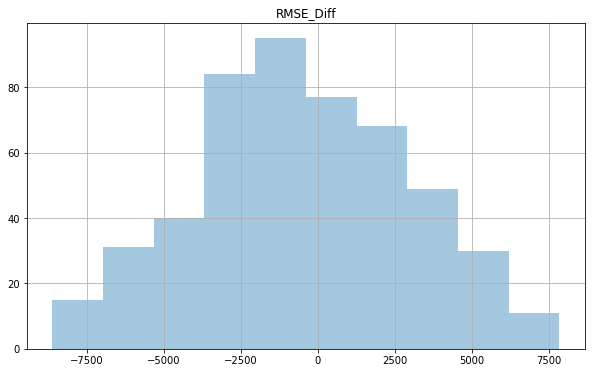

In [ ]:
# Visualising distribution
rmse_diff.hist(alpha=0.4, figsize=(10, 6))

In [ ]:
# Outputting CIs
print('The 90%% confidence interval for the difference in the RMSE values is %4.3f to %4.3f' % 
      (rmse_diff.quantile(0.10), rmse_diff.quantile(0.90)))
print('The 95%% confidence interval for the difference in the RMSE values is %4.3f to %4.3f' % 
      (rmse_diff.quantile(0.05), rmse_diff.quantile(0.95)))
print('The 99%% confidence interval for the difference in the RMSE values is %4.3f to %4.3f' % 
      (rmse_diff.quantile(0.01), rmse_diff.quantile(0.99)))

The 90% confidence interval for the difference in the RMSE values is -5180.889 to 4240.707
The 95% confidence interval for the difference in the RMSE values is -6382.944 to 5385.334
The 99% confidence interval for the difference in the RMSE values is -7645.572 to 7207.874


**Discussion**<br> 
The obtained CIs following bootstrapping in Section 4.3, if the models were correct, would have been the certainties of the estimated difference in RMSE values by the two different models at the stated percentages. Also, because they all pass through zero, there would have been no evidence to reject the null hypothesis that there is no difference in the spread of residuals between the two models of Section 4 (i.e. using Land Area as predictor and then using both Human Population and Suitable Land for storks as predictors of stork pair numbers).<br> 
<br> 

### **Section 5: Discussion and Conclusions**<br> 
  
Taking all the analysis results together, the first point of note to make is that using a dataset of 17 samples where the values are inherently so large and so varied probably does not lend itself well to ordinary least squares regression modelling, especially when the potential for spurious correlations, as exhibited in this dataset, is so high.<br>

In Section 3, the significance of the obtained intercepts should ideally show the values for human birth rates when the predictors of stork pair numbers (Section 3.1) and human populations (Section 3.2) were respectively zero.The obtained intercept values of 225 and -8.4 thousand respectively are meaningless in this case as stork pair numbers bear no relationship to human birth rates, and human population of zero with any associated birth rate is impossible, let alone a negative number. In such an instance, if human population had been a positive number in Section 3.2, then using a standardised human population as predictor variable may have been meaningful as the intercept would mean the average population rather than zero population. In any case, these particular models have been shown to be inappropriate for the task of analysing the data.<br>

The significance of the regression coefficients $\beta$ for the predictors, in an ideal situation, is the extent of their influence on the prediction. It is a measure of how much the mean of the predicted variable changes with one unit change in the predictor variable while holding other variables in the model constant. Since the models in this analysis have been showed to be inapproprite, the obtained output values cannot be interpreted correctly.<br> 

From the dataset table (Section 1.2) and summary statistics (Section 2.1), Turkey's suitable area percent (and hence suiatble area) for stork pairs, and also human population, are not out of the ordinary, i.e. are within reasonable standard deviations of the mean. Germany with 78 million and France with 57 million human populations at the time of the publication have greater populations than Turkey at 56 million, though Turkey's is above the interquartile range. It is Turkey's high human birth rate, around three times the upper quartile, that distorts the analysis. Poland's area and stork pair numbers also distort the analysis, but to a lesser extent than Turkey's.<br> 

It may have been better to treat Turkey, and perhaps Poland, as outliers and drop them from the dataset before analysis.


## **<center>References</center>**<br>
1.	Matthews, Robert 2000, “Storks Deliver Babies (p = 0.008)”, Teaching Statistics, vol. **22**, no. 2, pp. 36-38.<br>
2. Harbard, Chris 1999, pers. comm. (personal communication - not yet published).<br>
3. Nelson, David (Editor) 2008, Penguin Dictionary of Mathematics 4th Edition, p70.<br>
4. Topic 11: Confidence Intervals and Hypothesis Testing, Statistics for Data Science and AI module.